# 相关图

点线相关图是一类用于展示两个变量之间相关关系的可视化图形，通常在图中绘制每个样本的一对变量值作为点，并通过拟合线、相关系数和显著性标注来体现它们的相关程度。
它是探索变量之间线性或非线性关系的常用方法，尤其在科学研究和数据分析中非常常见。

`plot_correlation_figure` 提供了简洁易用的点线相关图功能，能够自动绘制变量散点、拟合线，可以计算并显示 Spearman 或 Pearson 两种相关系数（默认计算 Spearman 相关性）。
同时，`plot_correlation_figure` 会根据显著性水平自动标注 `*`、`**` 或 `***`，帮助用户快速判断相关性是否显著，适合用于科研图表、演示幻灯片或论文插图中。

## 快速出图

假如我们有两组样本数量一致的数据（每组包含 100 个样本），我们希望通过绘图直观展示它们之间是否存在相关性。
这通常可以通过点线相关图来实现，将每对样本值绘制为散点，并结合拟合线和相关系数，判断变量之间的相关程度及显著性。

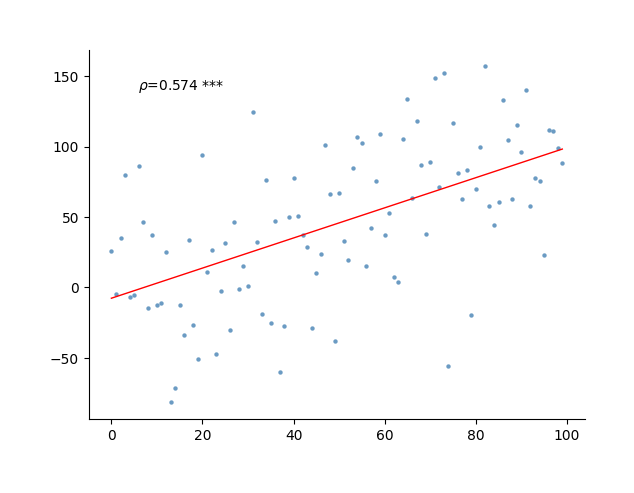

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

np.random.seed(42)
data1 = np.arange(100)
data2 = data1 + np.random.normal(1,50, 100)
# data2是在data1的基础上加上了噪声。
# 正经人都知道data1和data2相关，那么plotfig知不知道呢？

ax = plot_correlation_figure(data1,data2)

## hexbin图

利用 `hexbin=True` 。我们可以展示大量散点分布的密度，而不需要绘制所有的散点。

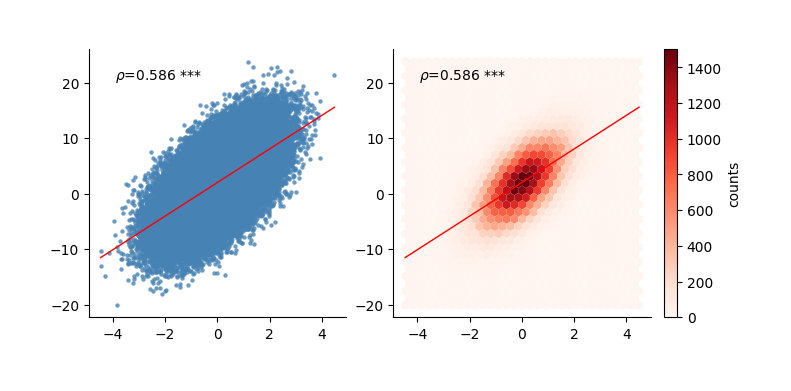

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

np.random.seed(42)
n = 100_000
data1 = np.random.standard_normal(n)
data2 = 2.0 + 3.0 * data1 + 4.0 * np.random.standard_normal(n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), layout="constrained")
ax1 = plot_correlation_figure(
    data1,
    data2,
    ax=ax1
)

hb = plot_correlation_figure(
    data1,
    data2,
    ax=ax2,
    hexbin=True,
    hexbin_cmap="Reds",
    hexbin_gridsize=30
)
cb = fig.colorbar(hb, ax=ax2, label='counts')

## 参数设置

全部参数见[`plot_correlation_figure`](../api/index.md/#plotfig.correlation)的 API 文档。

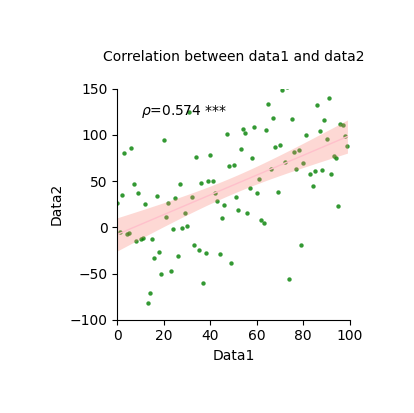

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

np.random.seed(42)
data1 = np.arange(100)
data2 = data1 + np.random.normal(1,50, 100)
# data2是在data1的基础上加上了噪声。
# 正经人都知道data1和data2相关，那么plotfig知不知道呢？

fig, ax = plt.subplots(figsize=(3, 3))
ax = plot_correlation_figure(
    data1,
    data2,
    stats_method="spearman",  # 仅有“spearman, pearson”，默认是spearman
    ci=True,  # 显示95%置信区间
    dots_color="green",
    line_color="pink",
    title_name="Correlation between data1 and data2",
    title_fontsize=10,
    title_pad=20,  # 控制释标题和图的距离，默认是10
    x_label_name="Data1",
    y_label_name="Data2",
    xlim=(0,100),
    ylim=(-100,150),
)